In [17]:
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import mpl

import dill
import os

from utils.generate_and_plot_signals import generate_signals, plot_signals, plot_source_signals
from utils import draw_states
from utils.calc_fun import calc_diff

os.environ["OMP_NUM_THREADS"] = "4"

In [18]:
plt.rcParams['font.family']=['Arial', 'Times New Roman']
plt.style.use('default')
mpl.rcParams["axes.unicode_minus"] = False
%config InlineBackend.figure_format = 'svg'

font = {'family':['Arial', 'Times New Roman'], 'color':'k', 'weight':'normal', 'size':10 }
colors = sns.color_palette('tab10')

# Generate or load data

In [19]:
# generate 50 random trials

n_trials = 50
n_ch = 6
n_times = 1001

raw_data = np.empty((n_trials, n_ch, n_times))
Atrue = np.random.random([n_ch, n_ch])

for t in range(n_trials):
    Strue = generate_signals(stationary=False)
    raw_data[t] = Atrue.dot(Strue)

X = raw_data[0]

# with open('./saves/generate_data.pkl', 'wb') as f:
#     dill.dump([Strue, Atrue, raw_data], f)

In [20]:
with open('./saves/generate_data.pkl', 'rb') as f:
    [Strue, Atrue, raw_data] = dill.load(f)

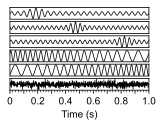

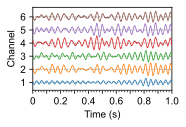

In [21]:
plot_signals(Strue, figsize=(2.5, 1.5));

plot_source_signals(raw_data[0], figsize=(2.5, 1.5));

# GMM Clustering

In [22]:
avg_data = np.mean(raw_data, axis=0)

pred_labels = np.zeros((3, 1001))
pred_center = []

for i, n_c in enumerate([3,5,7]):
    gmm = GMM(n_components=n_c).fit(avg_data.T)
    pred_labels[i] = gmm.predict(avg_data.T)

pred_labels += 1

d:\Anaconda3\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


# Plot microstate series

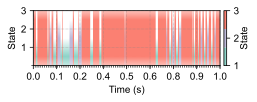

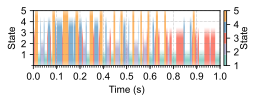

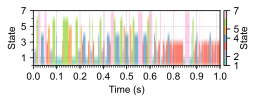

In [23]:
for i in range(3):
    draw_states.draw_state_blocks_for_generated_data(pred_labels[i], figsize=(3.5, 1.0), 
                                                     n_clusters=int(np.max(pred_labels[i])),
                                                     colorbar_fraction=0.015, tmin=0.0, tmax=1.0, 
                                                     colorbar_ticks=[]);

# Calculate errors

In [24]:
for i in range(3):
    # SSE, Distance, CH_Score, SI_Score, DB_Score
    values = calc_diff(avg_data.T, pred_labels[i])
    print(values)

(106.74692477359355, 10.331840338177587, 270.1149067029555, 0.15002277293348418, 1.6216227747277252)
(128.1811767798825, 11.321712625741853, 70.61058083384435, -0.02143727709522371, 3.4892659420913383)
(104.34210149857508, 10.214798162400228, 95.56246707657314, -0.07359924733516467, 2.9454803675673884)
